In [23]:
import pandas as pd

df = pd.read_csv('MASTER_PhonesmartdataAll_CCI_AdvStats.csv')

print(df.head())
print(df.dtypes) 
print(df.describe())

   Year Age GenderNum AutismQuotient STAI BRIEF_Total Device DailyAvgMins  \
0  2022             2              4   49          70                       
1  2021  37         2              8   44          33                       
2  2022             1                                                       
3  2022             1                                                       
4  2022             2                                                       

  DailyAvePickups  VS_RT_correct_Conjunction  VS_RT_correct_Single  
0                                1178.700000           1216.387500  
1                                 946.470000            785.597500  
2                                1182.741667            950.900000  
3                                1778.950000            984.333333  
4                                 521.500000            503.000000  
Year                           int64
Age                           object
GenderNum                     object
AutismQuotie

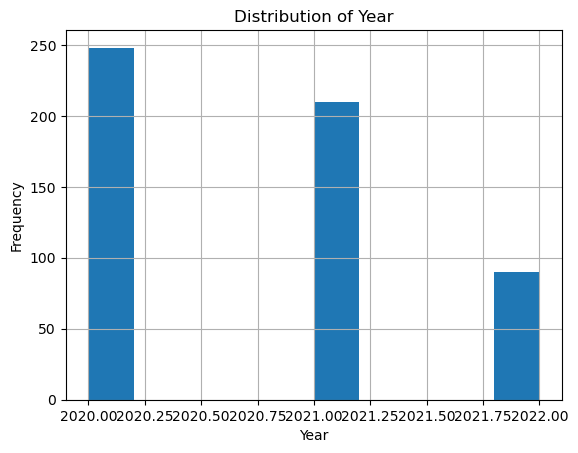

In [24]:
import matplotlib.pyplot as plt

df['Year'].hist()
plt.title('Distribution of Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

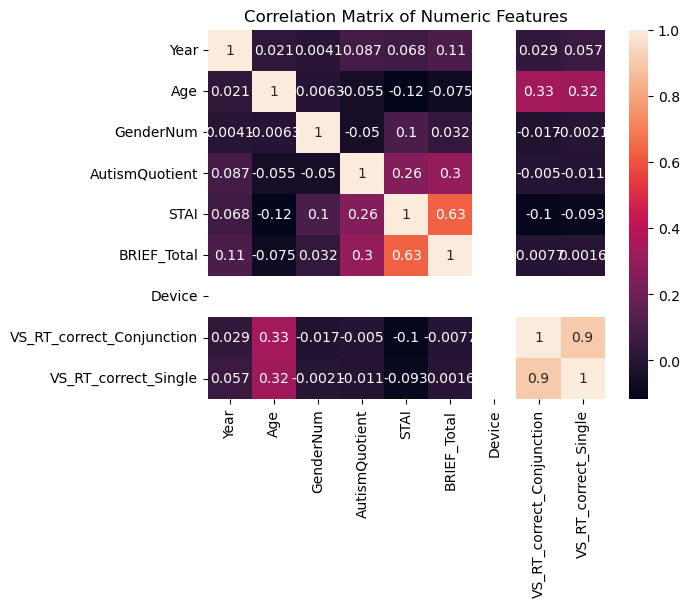

In [25]:
import seaborn as sns

df['AutismQuotient'] = pd.to_numeric(df['AutismQuotient'], errors='coerce')
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['GenderNum'] = pd.to_numeric(df['GenderNum'], errors='coerce')
df['STAI'] = pd.to_numeric(df['STAI'], errors='coerce')
df['BRIEF_Total'] = pd.to_numeric(df['BRIEF_Total'], errors='coerce')
df['Device'] = pd.to_numeric(df['Device'], errors='coerce')

numeric_cols = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_cols.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

In [30]:
from sklearn.impute import SimpleImputer
import numpy as np

X_train_dropped = X_train.drop('Device', axis=1)
X_test_dropped = X_test.drop('Device', axis=1)

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_train_imputed = imputer.fit_transform(X_train_dropped)
X_test_imputed = imputer.transform(X_test_dropped)

model = LinearRegression()
model.fit(X_train_imputed, y_train)

predictions = model.predict(X_test_imputed)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 6191.985964592719


In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_imputed, y_train)

predictions = model.predict(X_test_imputed)

l1_loss = mean_absolute_error(y_test, predictions)
l2_loss = mean_squared_error(y_test, predictions)

print(f'L1 Loss (MAE): {l1_loss}')
print(f'L2 Loss (MSE): {l2_loss}')

L1 Loss (MAE): 61.05014537812976
L2 Loss (MSE): 6191.985964592719


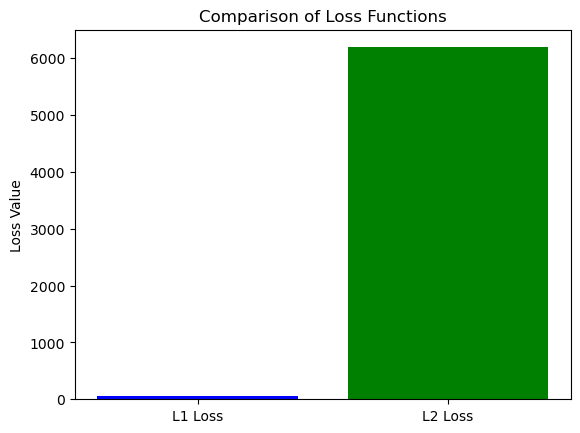

In [33]:
import matplotlib.pyplot as plt

loss_values = [l1_loss, l2_loss]
loss_labels = ['L1 Loss', 'L2 Loss']

plt.bar(loss_labels, loss_values, color=['blue', 'green'])
plt.ylabel('Loss Value')
plt.title('Comparison of Loss Functions')
plt.show()

In [34]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, predictions)
rmse = np.sqrt(l2_loss)

print(f'R-squared: {r2}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

R-squared: 0.761898116517634
Root Mean Squared Error (RMSE): 78.68917310909245


In [35]:
from sklearn.tree import DecisionTreeRegressor

regressor_no_pruning = DecisionTreeRegressor(random_state=42)
regressor_no_pruning.fit(X_train_imputed, y_train)

train_mse_no_pruning = mean_squared_error(y_train, regressor_no_pruning.predict(X_train_imputed))
test_mse_no_pruning = mean_squared_error(y_test, regressor_no_pruning.predict(X_test_imputed))

In [36]:
regressor_pruning = DecisionTreeRegressor(max_depth=3, random_state=42)
regressor_pruning.fit(X_train_imputed, y_train)

train_mse_pruning = mean_squared_error(y_train, regressor_pruning.predict(X_train_imputed))
test_mse_pruning = mean_squared_error(y_test, regressor_pruning.predict(X_test_imputed))

In [37]:
print("Without Pruning:")
print(f"Training MSE: {train_mse_no_pruning}")
print(f"Test MSE: {test_mse_no_pruning}")

print("\nWith Pruning:")
print(f"Training MSE: {train_mse_pruning}")
print(f"Test MSE: {test_mse_pruning}")

Without Pruning:
Training MSE: 0.0
Test MSE: 17895.922298590573

With Pruning:
Training MSE: 7200.808632607978
Test MSE: 7300.57369837371
